In [122]:
import os
import sys


os.environ["SPARK_HOME"]="/Users/jwh/Developer/spark-2.0.0-bin-hadoop2.6"
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
#라이브러리를 include 시킴
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))


In [123]:
import pyspark
os.path.expanduser("~")

myConf=pyspark.SparkConf()
#local은 클러스터를 안쓰고 자기만 쓴다
#config는 설정대로 넣는 것
#get or create는 팩토리패턴으로 있으면 있는거 쓰고 없으면 만들어 씀
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

In [124]:
myRdd2=spark.sparkContext\
    .textFile(os.path.join("data","ds_spark_wiki.txt"))

In [125]:
words=myRdd2.map(lambda x:x.split(' '))

In [126]:
words.take(1)

[[u'Wikipedia']]

In [127]:
words.count()

10

In [135]:
type (words)

pyspark.rdd.PipelinedRDD

In [138]:
words=myRdd2.map(lambda x:x.split(' '))
lenth = words.count()
i=0
while i < lenth:
    print words.take(i)
    i = i+1

[]
[[u'Wikipedia']]
[[u'Wikipedia'], [u'Apache', u'Spark', u'is', u'an', u'open', u'source', u'cluster', u'computing', u'framework.']]
[[u'Wikipedia'], [u'Apache', u'Spark', u'is', u'an', u'open', u'source', u'cluster', u'computing', u'framework.'], [u'\uc544\ud30c\uce58', u'\uc2a4\ud30c\ud06c\ub294', u'\uc624\ud508', u'\uc18c\uc2a4', u'\ud074\ub7ec\uc2a4\ud130', u'\ucef4\ud4e8\ud305', u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.']]
[[u'Wikipedia'], [u'Apache', u'Spark', u'is', u'an', u'open', u'source', u'cluster', u'computing', u'framework.'], [u'\uc544\ud30c\uce58', u'\uc2a4\ud30c\ud06c\ub294', u'\uc624\ud508', u'\uc18c\uc2a4', u'\ud074\ub7ec\uc2a4\ud130', u'\ucef4\ud4e8\ud305', u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.'], [u'Apache', u'Spark', u'Apache', u'Spark', u'Apache', u'Spark', u'Apache', u'Spark']]
[[u'Wikipedia'], [u'Apache', u'Spark', u'is', u'an', u'open', u'source', u'cluster', u'computing', u'framework.'], [u'\uc544\ud30c\uce58', u'\uc2a4\ud30c\ud06c\ub294', u'\uc

In [139]:
lenth = words.count()
i = 0
d = dict()
while i < lenth:
    for word in words.take(i):
        for w in word:
            if w not in d:
                d[w]=1
            else:
                d[w]=d[w]+1
    i = i+1

print "키-키값",d 

키-키값 {u'\uc18c\uc2a4': 7, u'computing': 8, u'developed': 4, u'is': 8, u'Wikipedia': 9, u'it': 2, u'AMPLab,': 4, u'an': 9, u'cluster': 8, u'maintained': 2, u'donated': 3, u'at': 4, u'\ucef4\ud4e8\ud305': 7, u'\uc544\ud30c\uce58': 27, u'open': 8, u'California,': 4, u'since.': 2, u'for': 1, u'to': 3, u'\ud074\ub7ec\uc2a4\ud130': 7, u'framework.': 8, u'source': 8, u'which': 2, u'Apache': 35, u'clusters': 1, u'Spark': 36, u'has': 2, u'was': 3, u'University': 4, u'provides': 1, u'Originally': 4, u'\uc2a4\ud30c\ud06c': 20, u'codebase': 3, u'interface': 1, u'with': 1, u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.': 7, u'Software': 3, u'entire': 1, u'Foundation,': 3, u'\uc624\ud508': 7, u'of': 4, u'later': 3, u'programming': 1, u'\uc2a4\ud30c\ud06c\ub294': 7, u"Berkeley's": 4, u'the': 10}


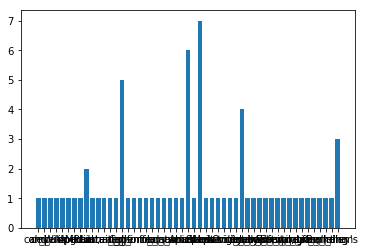

In [146]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt 
# 2단계로 나누어 그림
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

In [143]:
lenth = words.count()
i = 0
d = dict()

for word in words.take(lenth):
    for w in word:
            if w not in d:
                d[w]=1
            else:
                d[w]=d[w]+1
    i = i+1


print "키-키값",d 

키-키값 {u'and': 1, u'\uc18c\uc2a4': 1, u'computing': 1, u'developed': 1, u'is': 1, u'Wikipedia': 1, u'it': 1, u'AMPLab,': 1, u'an': 2, u'cluster': 1, u'maintained': 1, u'donated': 1, u'at': 1, u'\ucef4\ud4e8\ud305': 1, u'\uc544\ud30c\uce58': 5, u'open': 1, u'California,': 1, u'since.': 1, u'for': 1, u'to': 1, u'\ud074\ub7ec\uc2a4\ud130': 1, u'data': 1, u'framework.': 1, u'source': 1, u'which': 1, u'Apache': 6, u'clusters': 1, u'Spark': 7, u'has': 1, u'was': 1, u'University': 1, u'provides': 1, u'fault-tolerance.': 1, u'Originally': 1, u'\uc2a4\ud30c\ud06c': 4, u'codebase': 1, u'interface': 1, u'with': 1, u'implicit': 1, u'\ud504\ub808\uc784\uc6cc\ud06c\uc774\ub2e4.': 1, u'Software': 1, u'entire': 1, u'Foundation,': 1, u'\uc624\ud508': 1, u'of': 1, u'later': 1, u'programming': 1, u'\uc2a4\ud30c\ud06c\ub294': 1, u'parallelism': 1, u"Berkeley's": 1, u'the': 3}


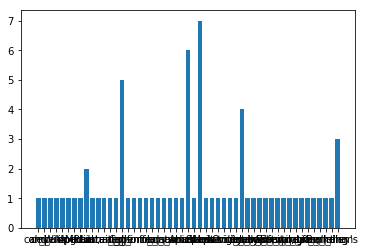

In [144]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt 
# 2단계로 나누어 그림
plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

In [148]:
#홈찾는거
import os
home=os.path.expanduser("~")

In [149]:
print home

/Users/jwh


In [152]:
import findspark
findspark.init(os.path.join(home,"Developer","spark-2.0.0-bin-hadoop2.6"))